In [1]:
!python setup.py -q install

zip_safe flag not set; analyzing archive contents...
tests.__pycache__.conftest.cpython-38: module references __file__


In [2]:
from europy.utils import load_global_params
from europy.decorators import bias, fairness, unit, integration, using_params, report_plt
from europy.lifecycle.reporting import execute_tests

In [3]:
params = load_global_params('tests/param_example.yml')

========= EuroPy Captured Params: (global) =========
  - global.a_global_param: 1e-06


In [4]:
@bias("ex test", "lorem ipsum")
@fairness()
@unit()
def example_test(input):
    return input

@integration()
@bias("ex failed test", "This test should fail")
def example_failure(input):
    assert input % 2 == 1

In [5]:
execute_tests(2)

Execute - ex test (['unit', 'fairness', 'bias'])
	PASS
Execute - ex failed test (['bias', 'integration'])
	FAIL
========= EuroPy Test Results =========
Total Tests: 2
Passing: 1
Failing: 1


,key,description,labels,result,success
0,ex test,lorem ipsum,"[unit, fairness, bias]",2,True
1,ex failed test,This test should fail,"[bias, integration]",<class 'AssertionError'>,False


In [6]:
@using_params('tests/param_example.yml')
def test_params(op1: int=None, op2: int=None, a_global_param=None):
    return op1 / (op2 + a_global_param)

result = test_params()
result

========= EuroPy Captured Params: (test_params) =========
  - global.a_global_param: 1e-06
  - test_params.op1: 4
  - test_params.op2: 3


1.333332888889037

========= EuroPy Figure Capture: (example_figure) =========
ReportFigure(
	title: fivethirtyeight fig,
	description: a really cool styled figure,
	tag: main_fig
)


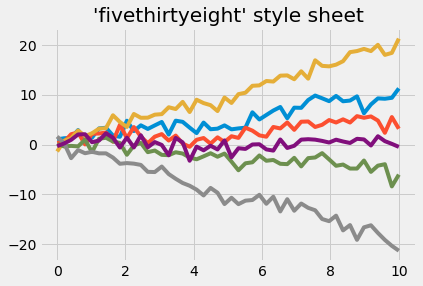

(<module 'matplotlib.pyplot' from '/Users/blaine/opt/anaconda3/envs/europy/lib/python3.8/site-packages/matplotlib/pyplot.py'>,
 ReportFigure(title: fivethirtyeight fig, description: a really cool styled figure, tag: main_fig))

In [7]:
@report_plt("example_figure")
def save_image_example(img_metadata=None):
    import matplotlib.pyplot as plt
    import numpy as np

    plt.style.use('fivethirtyeight')

    x = np.linspace(0, 10)

    # Fixing random state for reproducibility
    np.random.seed(19680801)

    fig, ax = plt.subplots()

    ax.plot(x, np.sin(x) + x + np.random.randn(50))
    ax.plot(x, np.sin(x) + 0.5 * x + np.random.randn(50))
    ax.plot(x, np.sin(x) + 2 * x + np.random.randn(50))
    ax.plot(x, np.sin(x) - 0.5 * x + np.random.randn(50))
    ax.plot(x, np.sin(x) - 2 * x + np.random.randn(50))
    ax.plot(x, np.sin(x) + np.random.randn(50))
    ax.set_title("'fivethirtyeight' style sheet")
    
    img_metadata.title = "fivethirtyeight fig"
    img_metadata.description = "a really cool styled figure"
    img_metadata.tag = "main_fig"

    return plt, img_metadata

save_image_example()